In [12]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import importlib
from tqdm import tqdm
from scripts import proj1_helpers, helpers
from scripts import implementation, feature_processing
from scripts.model_nn import *
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'

In [14]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [ ]:
X_p, (x_mean, x_std) = feature_processing.process_X(X, 2)
X_t_p, _ = feature_processing.process_X(X_t, 2, (x_mean, x_std))

In [16]:
X_p.shape

(250000, 73)

In [34]:
#Logistic
y_01 = 1 * (helpers.y_to_01(np.array([y]).T).flatten() > 0)
np.random.seed(1)
w0 = np.zeros((X_p.shape[1], 1))

In [17]:
seed = np.random.randint(1e6)
np.random.seed(seed)
hid_layers = [FullyConnectedLayer(input_dim=73, hidden_dim=50, act_func=ReLU(), w_initializer=init_weights),
                 FullyConnectedLayer(input_dim=50, hidden_dim=2, act_func=Softmax(), w_initializer=init_weights)]
network = SoftmaxNetwork(hid_layers)



  0%|          | 0/10 [00:00<?, ?it/s]/home/sergei/Documents/repos/git/EPFL/ML/Project1/src/scripts/model_nn.py:25: RuntimeWarning: invalid value encountered in greater
  return (1. * (x > 0))


 10%|█         | 1/10 [00:00<00:07,  1.19it/s]

 20%|██        | 2/10 [00:01<00:06,  1.18it/s]

 30%|███       | 3/10 [00:02<00:05,  1.21it/s]

 40%|████      | 4/10 [00:03<00:05,  1.20it/s]

 50%|█████     | 5/10 [00:04<00:04,  1.21it/s]

 60%|██████    | 6/10 [00:05<00:03,  1.18it/s]

 70%|███████   | 7/10 [00:06<00:02,  1.15it/s]

 80%|████████  | 8/10 [00:07<00:01,  1.13it/s]

 90%|█████████ | 9/10 [00:08<00:00,  1.09it/s]

100%|██████████| 10/10 [00:09<00:00,  1.10it/s]



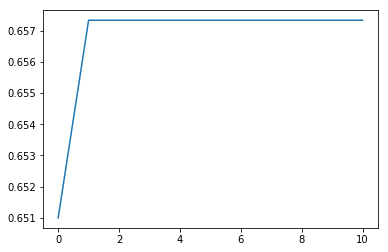

Accuracy with last weights: 65.73%


In [45]:
acc = [network.calc_accuracy(X_p[:1000,:], y_01[:1000])]
n_iter = 10
for i in tqdm(range(n_iter)):
    network.update_weights(x=X_p[:1000,:], y_tar=y_01[:1000], eps=1e-8)
    acc.append(network.calc_accuracy(X_p, y_01))
plt.plot(acc)
plt.show()
print('Accuracy with last weights: {:.2f}%'.format(acc[-1]*100))

In [ ]:
y_01

In [14]:
y_pred = proj1_helpers.predict_labels(w, X_t_p)

In [15]:
output_path = '../data/example_submission.csv'
proj1_helpers.create_csv_submission(ids_t, y_pred, output_path)

In [39]:
tqdm.get_lock().locks = []